# Unit 5 - Financial Planning

In [11]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [12]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [13]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [14]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [103]:
# Fetch current BTC price in USD as per marking criteria
btc_resp = requests.get(btc_url).json()

btc_price = btc_resp['data']['1']['quotes']['USD']['price']

# Fetch current ETH price in USD as per marketing criteria
eth_resp = requests.get(eth_url).json()

eth_price = eth_resp['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26748.00
The current value of your 5.3 ETH is $9093.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [33]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stocks = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stocks[df_stocks['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_stocks[df_stocks['symbol'] == 'SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stocks = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

df_stocks.index = df_stocks.index.date

# Preview DataFrame
df_stocks

AGG                                                          \
              open     high    low   close   volume trade_count       vwap   
2022-09-01  100.07  100.145  99.66  100.07  8960595       32259  99.954674   

               SPY                                                            
              open    high     low   close    volume trade_count        vwap  
2022-09-01  392.88  396.78  390.04  396.42  78315802      594723  393.055687

In [36]:
# Pick AGG and SPY close prices
agg_close_price = float(df_stocks['AGG']['close'])
spy_close_price = float(df_stocks['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.07
Current SPY closing price: $396.42


In [37]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19821.00
The current value of your 200 AGG shares is $20014.00


### Savings Health Analysis

In [104]:
# Set monthly household income
monthly_income = 1200

# Consolidate financial assets data
crypto_vtotal = my_btc_value + my_eth_value
stocks_vtotal = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame(
    {"amount": [crypto_vtotal, stocks_vtotal]},
    index=['crypto', 'shares']
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35841.369
shares,39835.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

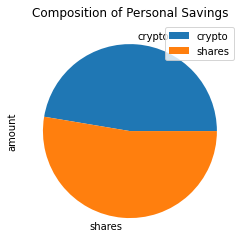

In [105]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [106]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_vtotal + stocks_vtotal

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Well done on reaching your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${round(emergency_fund - total_savings, 2)} away from reaching your goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [51]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [52]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                           SPY                                                 \
                  vwap    open    high     low   close     volume trade_count   
2016-05-02  110.627199  206.90  208.18  206.41  208.03   61908515      263580   
2016-05-03  110.865995  206.50  206.80  205.28  206.13  106422142      377518   
2016-05-04  110.879063  205.00  205.85  204.42  204.96   92199810      345261   
2016-05-05  111.028363  205.57  205.98  204.47  204.95   67597222      280622   
2016-05-06  111.031967  204.04  205.77  203.88  205.70   89131004      340335   

                        
                  vwap  
2016-05-02  207.294812  
2016-05-03  206.312060  
2016-05-04  205.090172  
2016-05-05  205.141555  
2016-05-06  204.937074

In [69]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [70]:
# Printing the simulation input data
MC_portfolio_thirty.portfolio_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.41  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.28  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.42  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.47  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.88  205.70   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659

In [71]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\FinTech_Activities\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993310,0.997494,1.011693,0.993241,1.003396,1.009803,0.998551,1.003029,0.998456,1.001903,...,0.991793,1.001909,0.996974,1.005900,0.999785,0.990236,1.005445,0.998846,1.017295,0.994331
2,0.996040,0.997318,1.008879,0.996551,0.995112,1.005398,0.992347,1.005190,0.992707,1.001952,...,0.988242,1.000024,0.989407,0.996721,0.996244,0.999622,1.001064,1.021330,1.008898,1.005812
3,1.005373,0.988559,1.010378,1.001116,0.998335,0.997729,0.996933,1.006069,0.994435,1.008261,...,1.006028,0.989235,0.995211,0.987107,1.001703,1.002624,0.997041,1.005690,1.005046,1.000507
4,0.999250,0.985874,1.008432,0.988563,0.996409,1.001742,1.011212,1.021085,0.991994,1.000908,...,1.000749,0.986378,0.997137,0.994515,1.011200,0.999919,1.008584,1.021411,1.002689,1.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.697277,21.184082,22.699859,22.742085,21.602670,7.234222,18.674956,43.297246,28.765749,11.597823,...,30.303030,17.311632,15.787547,6.347185,11.255896,21.479871,10.746352,4.822326,8.612383,15.567168
7557,12.726879,21.036341,22.703931,22.611471,21.634731,7.231302,18.856387,43.672353,28.769230,11.689955,...,30.057958,17.228663,15.713864,6.349937,11.348141,21.506740,10.745863,4.842133,8.660997,15.662451
7558,12.713586,21.080916,22.663243,22.674085,21.294375,7.316961,18.930876,43.926686,28.651542,11.880529,...,30.125081,17.127710,15.863110,6.369646,11.324306,21.663322,10.764305,4.863469,8.688736,15.484522
7559,12.699525,21.112864,22.622512,22.788100,21.351250,7.381633,18.989416,44.435082,28.918713,11.709525,...,29.557400,16.978795,16.006010,6.363323,11.252199,21.678423,10.680511,4.925930,8.663966,15.522674


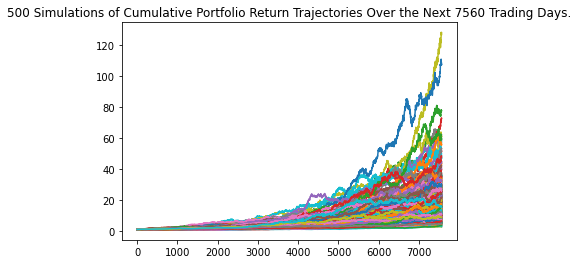

In [72]:
# Plot simulation outcomes
line_plot = MC_portfolio_thirty.plot_simulation()

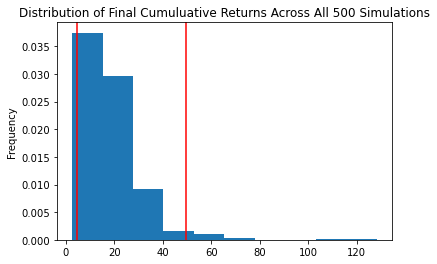

In [73]:
# Plot probability distribution and confidence intervals
dis_plot = MC_portfolio_thirty.plot_distribution()

### Retirement Analysis

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_mc_results = MC_portfolio_thirty.summarize_cumulative_return()

# Print summary statistics
print(thirty_mc_results)

count           500.000000
mean             18.483642
std              12.522957
min               2.638125
25%              10.731936
50%              15.922088
75%              22.839929
max             128.124047
95% CI Lower      4.786635
95% CI Upper     49.451533
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [75]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_mc_results[8]*20000,2)
ci_upper = round(thirty_mc_results[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95732.71 and $989030.67


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [76]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_mc_results[8]*30000,2)
ci_upper = round(thirty_mc_results[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143599.06 and $1483546.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [78]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [79]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\FinTech_Activities\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999049,1.013641,1.007540,1.008672,1.010281,0.994709,0.992879,1.009088,1.007844,1.006145,...,0.993084,1.007530,0.999026,0.999543,1.014803,1.021019,0.992565,0.998062,0.998329,1.008559
2,1.000177,1.034017,1.004960,1.011100,1.011802,0.994746,0.994684,1.011943,1.007420,1.011751,...,1.004231,1.025557,1.008898,0.998423,1.022887,1.011081,0.993239,0.998337,0.996643,0.997261
3,0.991845,1.031933,1.009325,1.011128,1.017541,0.978770,1.004941,1.007161,1.013488,1.016198,...,1.018899,1.028468,1.009902,0.987244,1.017852,0.991746,1.001486,0.993551,0.993846,1.000739
4,0.995385,1.050857,0.998996,1.013620,1.015879,0.990898,1.010317,1.003084,1.015916,1.004542,...,0.994338,1.040642,1.014340,0.988064,1.027218,0.975647,1.005375,0.992800,0.991157,1.019741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.723992,2.352740,1.216257,0.972715,1.603022,2.179408,1.924105,1.688500,1.098607,4.231471,...,1.492821,1.310597,1.850520,1.732794,1.154702,2.192575,1.802421,1.315780,1.606893,1.711673
1257,1.709821,2.366338,1.230572,0.960412,1.615286,2.182278,1.913005,1.671357,1.088242,4.251826,...,1.492917,1.331063,1.853913,1.739282,1.171596,2.210227,1.776771,1.289211,1.566411,1.690124
1258,1.711318,2.345450,1.204705,0.958873,1.621800,2.184672,1.941101,1.689940,1.107528,4.212948,...,1.500107,1.323524,1.863973,1.742699,1.186711,2.208729,1.788552,1.280696,1.567797,1.708700
1259,1.686905,2.306084,1.207798,0.964938,1.626095,2.189608,1.920354,1.670011,1.104123,4.256139,...,1.494340,1.319393,1.881521,1.740811,1.189592,2.226828,1.809858,1.281646,1.562875,1.715103


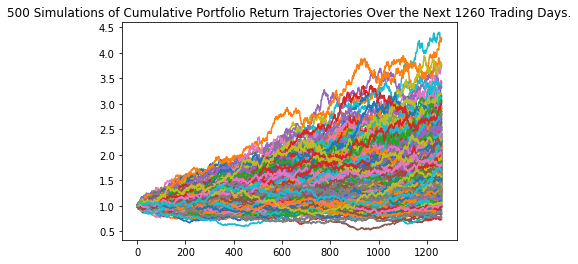

In [80]:
# Plot simulation outcomes
line_plot = MC_portfolio_five.plot_simulation()

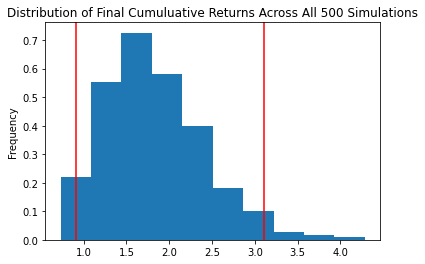

In [81]:
# Plot probability distribution and confidence intervals
dis_plot = MC_portfolio_five.plot_distribution()

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
five_mc_results = MC_portfolio_five.summarize_cumulative_return()

# Print summary statistics
print(five_mc_results)

count           500.000000
mean              1.827762
std               0.587784
min               0.730632
25%               1.410198
50%               1.753576
75%               2.186673
max               4.285376
95% CI Lower      0.915022
95% CI Upper      3.112066
Name: 1260, dtype: float64


In [83]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_mc_results[8]*60000,2)
ci_upper_five = round(five_mc_results[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54901.3 and $186723.98


### Ten Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [86]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\FinTech_Activities\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984204,0.995522,1.003086,1.000491,1.000416,1.004079,0.980179,0.999664,1.003144,1.011855,...,1.017913,0.992230,0.996121,1.019324,1.000663,0.990061,0.983308,1.014691,1.018721,1.007973
2,0.996156,0.990208,1.011630,1.007981,1.006710,1.008782,0.988037,1.011076,0.996875,1.020243,...,1.006125,0.999787,0.994052,1.014768,0.993991,0.994122,0.972564,1.023116,1.032225,1.013123
3,0.988566,1.000680,1.018738,1.010238,1.019507,1.021612,0.992546,1.021979,0.994518,1.019223,...,1.025254,0.981829,1.004904,1.007861,0.987783,1.013342,0.966445,1.024423,1.039921,1.008487
4,0.993792,0.990894,1.020020,0.999677,1.020330,1.007438,0.995557,1.013626,1.007973,1.018280,...,1.023045,0.973765,1.012451,0.997120,0.994766,1.010738,0.958702,1.020533,1.043870,1.010898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.542399,3.984071,2.369289,4.230532,1.700606,3.108207,4.578011,3.189983,3.173559,2.308879,...,3.846863,1.281726,2.212482,2.997849,2.106402,2.722354,4.750862,1.398909,2.515852,6.902446
2517,2.492816,3.978182,2.371892,4.208332,1.684055,3.100443,4.639009,3.199385,3.189878,2.289246,...,3.851910,1.275479,2.208189,2.995525,2.149492,2.729670,4.705375,1.369036,2.500692,6.887161
2518,2.471320,3.909739,2.382364,4.258889,1.714523,3.121409,4.635118,3.238358,3.210687,2.293314,...,3.886311,1.262828,2.206422,2.975790,2.143188,2.729748,4.697330,1.365373,2.470739,6.934872
2519,2.475108,3.889214,2.384460,4.227575,1.712805,3.170498,4.652611,3.219230,3.243591,2.285318,...,3.914666,1.247146,2.165541,2.961608,2.127272,2.710948,4.681334,1.356346,2.524642,7.009501


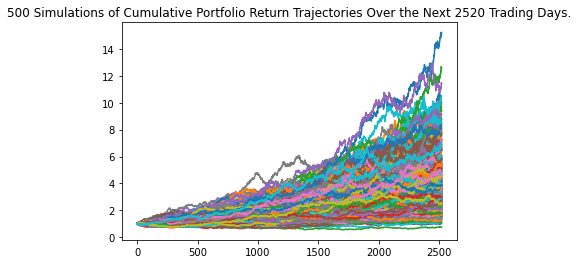

In [93]:
# Plot simulation outcomes
line_plot = MC_portfolio_ten.plot_simulation()

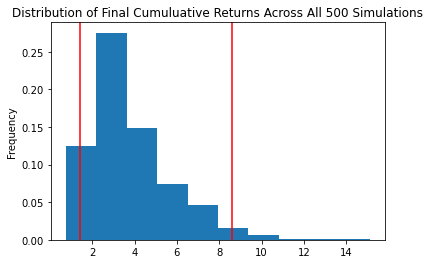

In [94]:
# Plot probability distribution and confidence intervals
dis_plot = MC_portfolio_ten.plot_distribution()

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_mc_results = MC_portfolio_ten.summarize_cumulative_return()

# Print summary statistics
print(ten_mc_results)

count           500.000000
mean              3.783000
std               1.947692
min               0.751792
25%               2.459842
50%               3.267952
75%               4.594790
max              15.126373
95% CI Lower      1.416460
95% CI Upper      8.600027
Name: 2520, dtype: float64


In [99]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_mc_results[8]*60000,2)
ci_upper_ten = round(ten_mc_results[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $84987.59 and $516001.61


In [102]:
#Having the portfolio more weighted towards the stock 'SPY' rather than the bond 'AGG' will be unlikely to make the credit union worker retire early after 10 years.
#This is because the mean, CI lower and CI upper are all higher on the 30 year portfolio than they are on the 10 year portfolio
#Dividing the mean, CI lower and CI upper by 3 (30 / 10) to take into consideration the cumulative returns and compounding and the 30 years will still provide greater returns